
# **Car Price Regression Model**

Dataset: https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes?select=audi.csv




In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

**Part 1: Read Dataset**

In [19]:
dataFile = 'audi.csv'
data = pd.read_csv(dataFile, sep=',')
print(data)


      model  year  price transmission  ...  fuelType  tax   mpg  engineSize
0        A1  2017  12500       Manual  ...    Petrol  150  55.4         1.4
1        A6  2016  16500    Automatic  ...    Diesel   20  64.2         2.0
2        A1  2016  11000       Manual  ...    Petrol   30  55.4         1.4
3        A4  2017  16800    Automatic  ...    Diesel  145  67.3         2.0
4        A3  2019  17300       Manual  ...    Petrol  145  49.6         1.0
...     ...   ...    ...          ...  ...       ...  ...   ...         ...
10663    A3  2020  16999       Manual  ...    Petrol  145  49.6         1.0
10664    A3  2020  16999       Manual  ...    Petrol  150  49.6         1.0
10665    A3  2020  17199       Manual  ...    Petrol  150  49.6         1.0
10666    Q3  2017  19499    Automatic  ...    Petrol  150  47.9         1.4
10667    Q3  2016  15999       Manual  ...    Petrol  150  47.9         1.4

[10668 rows x 9 columns]


**Part 2: Exploratory Data Analysis**

Check if there is null data

In [20]:
print(data.isnull().sum())
print(data.describe())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64
               year          price        mileage           tax           mpg  \
count  10668.000000   10668.000000   10668.000000  10668.000000  10668.000000   
mean    2017.100675   22896.685039   24827.244001    126.011436     50.770022   
std        2.167494   11714.841888   23505.257205     67.170294     12.949782   
min     1997.000000    1490.000000       1.000000      0.000000     18.900000   
25%     2016.000000   15130.750000    5968.750000    125.000000     40.900000   
50%     2017.000000   20200.000000   19000.000000    145.000000     49.600000   
75%     2019.000000   27990.000000   36464.500000    145.000000     58.900000   
max     2020.000000  145000.000000  323000.000000    580.000000    188.300000   

         engineSize  
count  10668.000000  
mean       1.930709  
std        0.602957  
min    

Plot categorical attributes and Pair plot

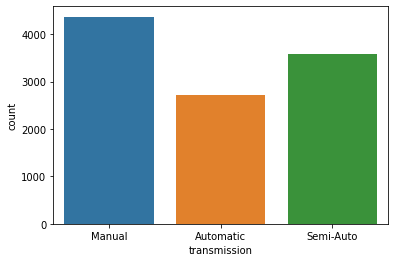

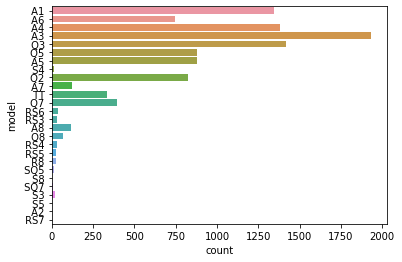

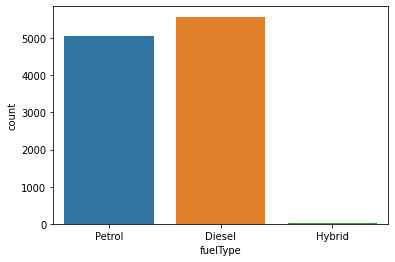

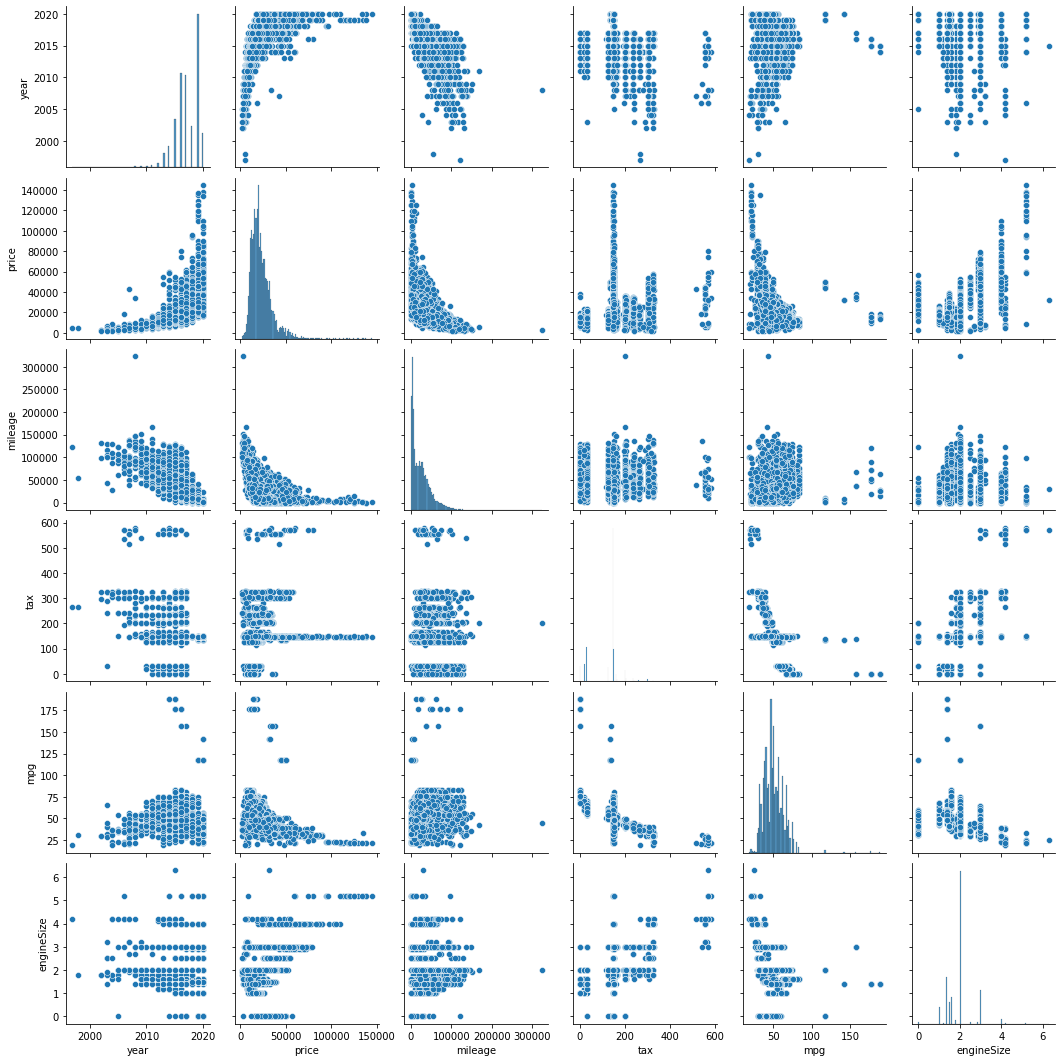

In [21]:
sns.countplot(x="transmission", data=data)
plt.show()

sns.countplot(y=data["model"])
plt.show()

sns.countplot(x="fuelType", data=data)
plt.show()

sns.pairplot(data)
plt.show()

Correlation Matrix

In [22]:
corr_matrix = data.corr()
print(corr_matrix['price'].sort_values(ascending=False))

price         1.000000
year          0.592581
engineSize    0.591262
tax           0.356157
mileage      -0.535357
mpg          -0.600334
Name: price, dtype: float64


**Part 3: Preprocessing**

In [23]:
# compute age of car by subtracting 2020 from the 'year' field
if 'year' in data.columns:
  data["age_of_car"] = 2020 - data["year"]
  data = data.drop(columns=["year"])

print(data)

      model  price transmission  mileage  ...  tax   mpg  engineSize  \
0        A1  12500       Manual    15735  ...  150  55.4         1.4   
1        A6  16500    Automatic    36203  ...   20  64.2         2.0   
2        A1  11000       Manual    29946  ...   30  55.4         1.4   
3        A4  16800    Automatic    25952  ...  145  67.3         2.0   
4        A3  17300       Manual     1998  ...  145  49.6         1.0   
...     ...    ...          ...      ...  ...  ...   ...         ...   
10663    A3  16999       Manual     4018  ...  145  49.6         1.0   
10664    A3  16999       Manual     1978  ...  150  49.6         1.0   
10665    A3  17199       Manual      609  ...  150  49.6         1.0   
10666    Q3  19499    Automatic     8646  ...  150  47.9         1.4   
10667    Q3  15999       Manual    11855  ...  150  47.9         1.4   

       age_of_car  
0               3  
1               4  
2               4  
3               3  
4               1  
...           .

one-hot encoding

In [24]:
# one-hot encoding for categorical attributes
data_onehot = pd.get_dummies(data, columns=['model', 'transmission', 'fuelType'])

# separate features and target variable
X = data_onehot.drop(['price'], axis=1)
Y = data_onehot['price']

print(data_onehot)

       price  mileage  tax   mpg  ...  transmission_Semi-Auto  \
0      12500    15735  150  55.4  ...                       0   
1      16500    36203   20  64.2  ...                       0   
2      11000    29946   30  55.4  ...                       0   
3      16800    25952  145  67.3  ...                       0   
4      17300     1998  145  49.6  ...                       0   
...      ...      ...  ...   ...  ...                     ...   
10663  16999     4018  145  49.6  ...                       0   
10664  16999     1978  150  49.6  ...                       0   
10665  17199      609  150  49.6  ...                       0   
10666  19499     8646  150  47.9  ...                       0   
10667  15999    11855  150  47.9  ...                       0   

       fuelType_Diesel  fuelType_Hybrid  fuelType_Petrol  
0                    0                0                1  
1                    1                0                0  
2                    0                0   

Split Training and test set

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Standard Scaler to fit training data in X

In [26]:
scalerX = StandardScaler().fit(X_train)
X_train_std = scalerX.transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)

And apply the same scaler on testing data

In [27]:
X_test_std = scalerX.transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=X_test.columns)

**Part 4: Modeling**

List of regression models to evaluate

In [28]:
models_to_evaluate = [DecisionTreeRegressor(), SVR(kernel='linear'), RandomForestRegressor()]

Train the models and plot predictions vs target in training data

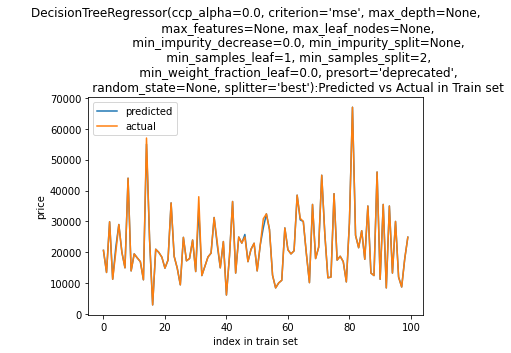

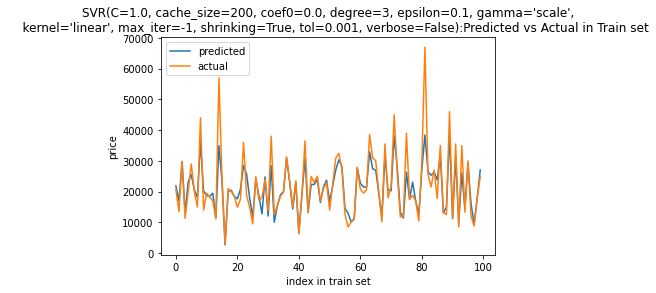

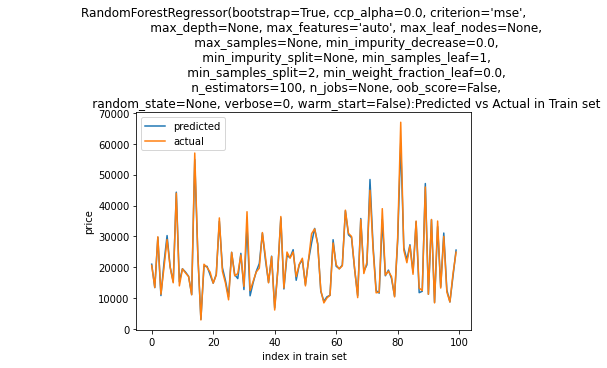

In [29]:
for regr in models_to_evaluate:
  model_name = str(regr)
  regr.fit(X_train_std, Y_train)

  # copy the DataFrame indexes
  results = X_train.copy()
  results["predicted"] = regr.predict(X_train_std)
  results["actual"] = Y_train
  results = results[['predicted', 'actual']]
  results['predicted'] = results['predicted'].round(2)

  # reset the index of DataFrame and use the default indexing (0 1 2 3...N-1)
  results = pd.DataFrame.reset_index(results, drop=True)

  # visualize predicted vs actual in train set
  plt.plot(results['predicted'].head(100), label='predicted')
  plt.plot(results['actual'].head(100), label='actual')
  plt.xlabel('index in train set')
  plt.ylabel('price')
  plt.title(model_name + ':Predicted vs Actual in Train set')
  plt.legend()
  plt.show()

**Part 5: Accuracy & Evaluation**

Define mean absolute percentage error metric

In [30]:
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Define a DataFrame object to store evaluation performance

In [31]:
model_performance = pd.DataFrame(columns=['Model', 'Train MAE', 'Train RMSE', 'Train MAPE',
                      'CV RMSE', 'Test MAE', 'Test RMSE', 'Test MAPE'])

Evaluate models on test set and Plot predictions vs target

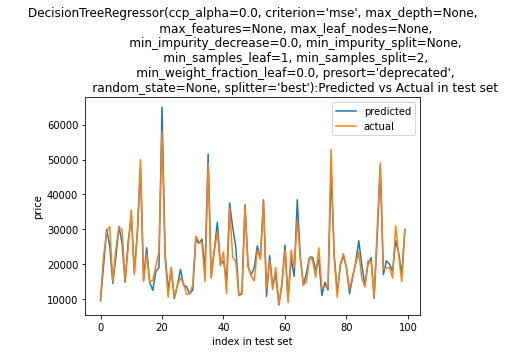

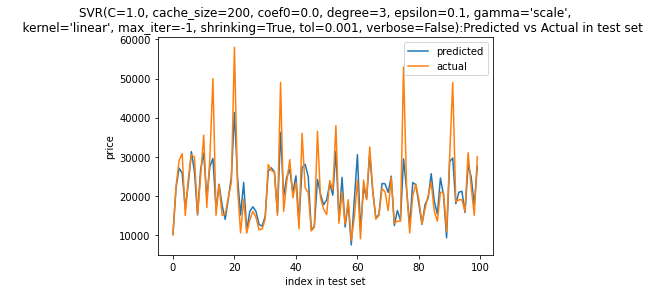

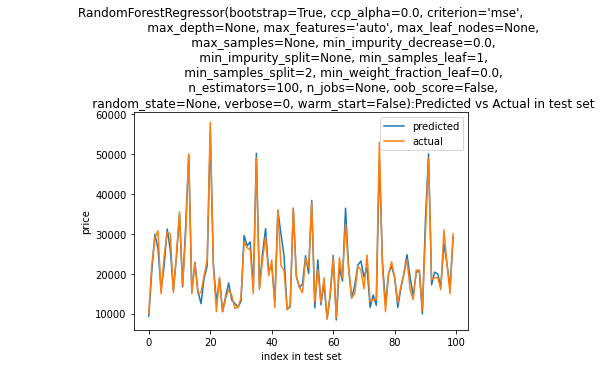

In [32]:
for regr in models_to_evaluate:
  model_name = str(regr)

  Y_train_pred = regr.predict(X_train_std)

  Train_MAE = mean_absolute_error(Y_train, Y_train_pred).round(2)
  Train_RMSE = np.sqrt(mean_squared_error(Y_train, Y_train_pred).round(2))
  Train_MAPE = mean_absolute_percentage_error(Y_train, Y_train_pred).round(2)

  # 5 - fold Cross Validation on training data for model validation
  # RMSE
  CV = cross_validate(regr, X_train_std, Y_train, cv=5, scoring='neg_root_mean_squared_error')
  CV['test_score'] = -CV['test_score']
  CV_Overall_RMSE = np.mean(CV['test_score']).round(2)

  # after validating the model, use the test set to compute generalization error
  Y_test_pred = regr.predict(X_test_std)

  Test_MAE = mean_absolute_error(Y_test, Y_test_pred).round(2)
  Test_RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred)).round(2)
  Test_MAPE = mean_absolute_percentage_error(Y_test, Y_test_pred).round(2)

  model_performance = model_performance.append({'Model': model_name, 'Train MAE': Train_MAE,
                                                  'Train RMSE': Train_RMSE, 'Train MAPE': Train_MAPE,
                                                  'CV RMSE': CV_Overall_RMSE, 'Test MAE': Test_MAE,
                                                  'Test RMSE': Test_RMSE, 'Test MAPE': Test_MAPE},
                                                 ignore_index=True)

  # copy the DataFrame indexes
  test_results = X_test.copy()
  test_results["predicted"] = Y_test_pred
  test_results["actual"] = Y_test
  test_results = test_results[['predicted', 'actual']]
  test_results['predicted'] = test_results['predicted'].round(2)

  # reset the index of DataFrame and use the default indexing (0 1 2 3...N-1)
  test_results = pd.DataFrame.reset_index(test_results, drop=True)

  # visualize predicted vs actual in test set
  plt.plot(test_results['predicted'].head(100), label='predicted')
  plt.plot(test_results['actual'].head(100), label='actual')
  plt.xlabel('index in test set')
  plt.ylabel('price')
  plt.title(model_name + ':Predicted vs Actual in test set')
  plt.legend()
  plt.show()

Display the evaluation metrics

In [33]:
pd.set_option('max_columns', 8)
print(model_performance)

                                               Model  Train MAE   Train RMSE  \
0  DecisionTreeRegressor(ccp_alpha=0.0, criterion...      47.79   319.573294   
1  SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...    3166.68  6084.544536   
2  RandomForestRegressor(bootstrap=True, ccp_alph...     579.73   908.574559   

   Train MAPE  CV RMSE  Test MAE  Test RMSE  Test MAPE  
0        0.16  3124.98   1930.72    3044.25       8.88  
1       12.72  6472.07   3420.31    6690.45      12.94  
2        2.73  2367.83   1527.13    2309.50       7.05  
